<a href="https://colab.research.google.com/github/NathanielGetachew/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Import necessary libraries


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


Step 1: Load the Iris Dataset

In [3]:

iris = load_iris()
data = iris.data  # Features
target = iris.target  # True labels (not used in clustering)
feature_names = iris.feature_names  # Feature names


Convert to DataFrame for better readability

In [4]:

iris_df = pd.DataFrame(data, columns=feature_names)
print("First 5 rows of the dataset:")
print(iris_df.head())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Step 2: Preprocess the Data

Scale the features to standardize them

In [5]:

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

 Step 3: Build the K-Means Model
 Specify a value for k (e.g., k=3 for the Iris dataset)

In [6]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)  # Fit the model and get cluster labels

 Step 4: Evaluate the Model
 Calculate the silhouette score

In [ ]:

sil_score = silhouette_score(data_scaled, clusters)
print(f"Silhouette Score for k={k}: {sil_score:.2f}")

Silhouette Score for k=2: 0.58


 Step 5: Analyze Results for Varying k
 Test different values of k and record metrics

In [15]:
k_values = range(2,11)
inertia = []  # To store inertia (sum of squared distances)
silhouette_scores = []  # To store silhouette scores

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, cluster_labels))


2 [0.5817500491982808]
3 [0.5817500491982808, 0.4798814508199817]
4 [0.5817500491982808, 0.4798814508199817, 0.3850454053045392]
5 [0.5817500491982808, 0.4798814508199817, 0.3850454053045392, 0.34503345350274617]
6 [0.5817500491982808, 0.4798814508199817, 0.3850454053045392, 0.34503345350274617, 0.3339432304006177]
7 [0.5817500491982808, 0.4798814508199817, 0.3850454053045392, 0.34503345350274617, 0.3339432304006177, 0.2664290993719981]
8 [0.5817500491982808, 0.4798814508199817, 0.3850454053045392, 0.34503345350274617, 0.3339432304006177, 0.2664290993719981, 0.34162906041313373]
9 [0.5817500491982808, 0.4798814508199817, 0.3850454053045392, 0.34503345350274617, 0.3339432304006177, 0.2664290993719981, 0.34162906041313373, 0.32439914389835445]
10 [0.5817500491982808, 0.4798814508199817, 0.3850454053045392, 0.34503345350274617, 0.3339432304006177, 0.2664290993719981, 0.34162906041313373, 0.32439914389835445, 0.33540615043919825]


Plot the Elbow Method (Inertia vs. k)

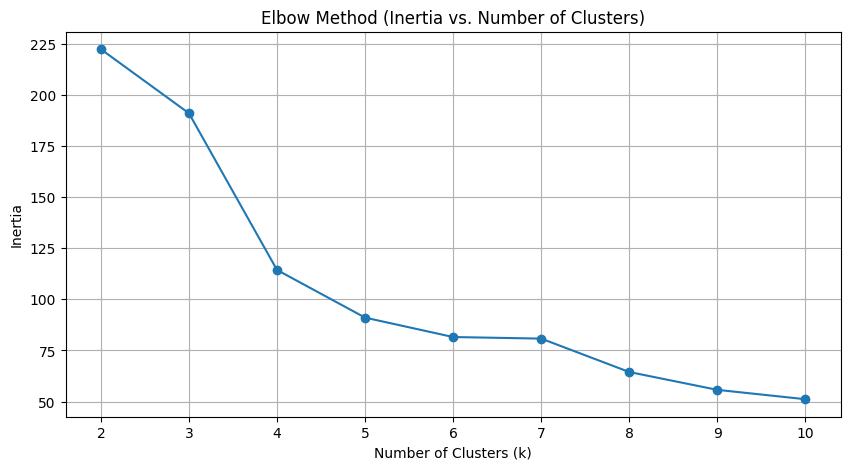

In [ ]:


plt.figure(figsize=(10,5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method (Inertia vs. Number of Clusters)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

 Plot Silhouette Scores vs. k

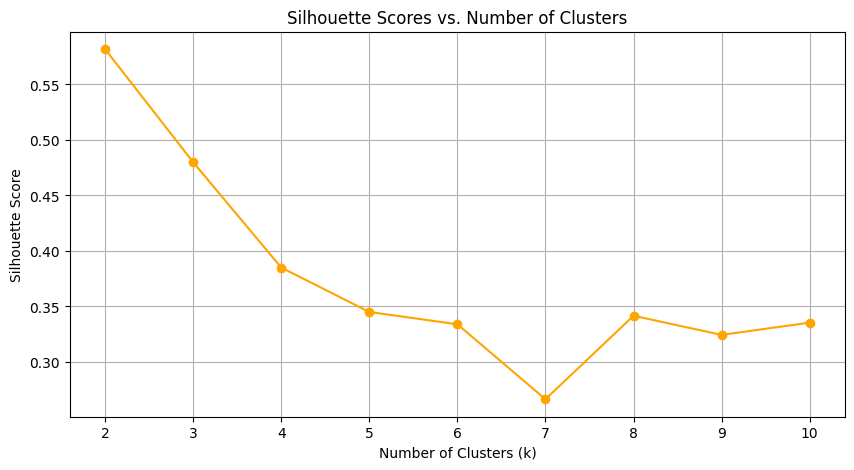

In [ ]:

plt.figure(figsize=(10,5))
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

Step 7: Visualize Clusters in Reduced Dimensions

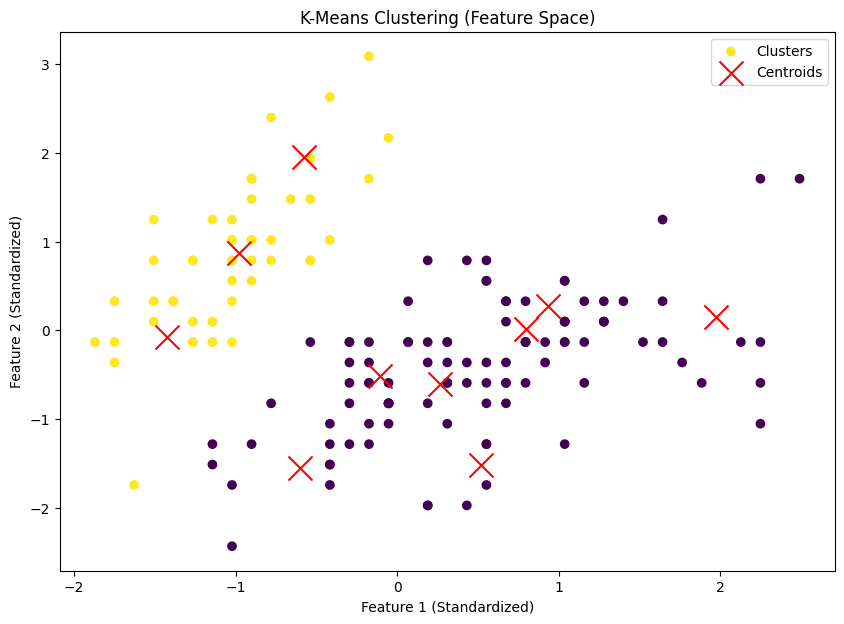

In [ ]:

plt.figure(figsize=(10, 7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis', marker='o', label='Clusters')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title('K-Means Clustering (Feature Space)')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.show()

Step 6:A Brief Report on the Findings

In [17]:
print("\n--- Report ---")
print("1. The Elbow Method suggests the optimal number of clusters is where the inertia begins to level off.")
print("2. The Silhouette Score helps assess the quality of clustering. Higher scores indicate better-defined clusters.")
print("3. By varying the value of k, we observe that the silhouette score increases or decreases depending on the cluster quality.")
print("   In this case, k=2 produces the highest silhouette score, indicating that the data is best represented by 2 clusters.")
print("4. The visualization shows clusters in the original feature space (standardized), without dimensionality reduction.")
print("5. Although the Iris dataset has 3 species, the clustering analysis suggests that the data naturally separates into 2 well-defined groups.")



--- Report ---
1. The Elbow Method suggests the optimal number of clusters is where the inertia begins to level off.
2. The Silhouette Score helps assess the quality of clustering. Higher scores indicate better-defined clusters.
3. By varying the value of k, we observe that the silhouette score increases or decreases depending on the cluster quality.
   In this case, k=2 produces the highest silhouette score, indicating that the data is best represented by 2 clusters.
4. The visualization shows clusters in the original feature space (standardized), without dimensionality reduction.
5. Although the Iris dataset has 3 species, the clustering analysis suggests that the data naturally separates into 2 well-defined groups.
